In [17]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set()

In [3]:
data_dir = 'data'

In [4]:
og_data_file = os.path.abspath(
                os.path.join(data_dir, 'METAS_monitoramento.xlsx')
        )

In [5]:
df = pd.read_excel(og_data_file)

In [6]:
df.dtypes

Secretaria                                                      object
Secretaria1                                                     object
Meta                                                            object
Orçamento Realizado até dez/2021                               float64
Entrega física realizada até fev/2022                          float64
Entrega física prevista para o quadriênio                      float64
Execução Orçamentária (empenho dez/21 em relação ao custo)     float64
Índice de cumprimento acumulado (no quadriênio)                float64
Execução Orçamentária (liq/emp - até dez/2021)                 float64
Índice de cumprimento acumulado (até fev/2022)                 float64
Custo Previsto                                                 float64
dtype: object

In [7]:
cols_interesse = {
                'Secretaria' : 'secretaria', 
                'Meta' : 'meta', 
                'Execução Orçamentária (liq/emp - até dez/2021) ' : 'exec_orcamentaria',
                'Índice de cumprimento acumulado (até fev/2022)' : 'indice_cumprimento',
                'Custo Previsto' : 'custo_previsto'
}

In [8]:
df = df[list(cols_interesse.keys())]
df = df.rename(cols_interesse, axis=1)

In [9]:
X = df[['exec_orcamentaria', 'indice_cumprimento', 'custo_previsto']]

In [10]:
X.isna().sum()

exec_orcamentaria     0
indice_cumprimento    0
custo_previsto        5
dtype: int64

In [11]:
X = X.fillna(0)

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler()

In [14]:
X = scaler.fit_transform(X)

In [15]:
from sklearn.cluster import KMeans

Text(0.5, 1.0, 'Elbow curve')

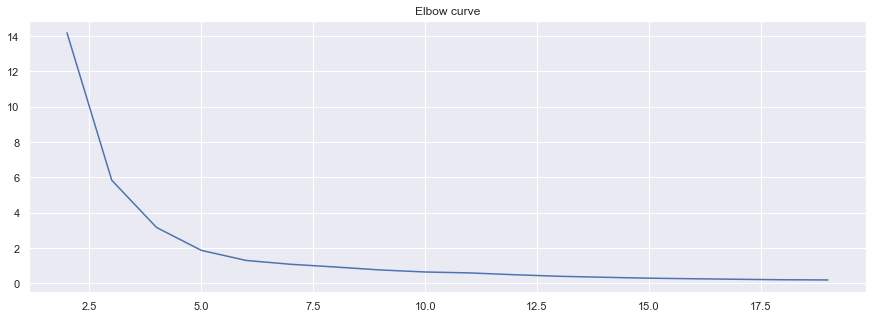

In [20]:
distorsions = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions)
plt.grid(True)
plt.title('Elbow curve')


<AxesSubplot:xlabel='exec_orcamentaria', ylabel='indice_cumprimento'>

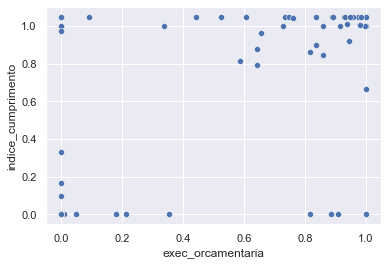

In [19]:
sns.scatterplot(x= df['exec_orcamentaria'], y = df['indice_cumprimento'])

In [37]:
kmeans = KMeans(n_clusters=4)
grupos = kmeans.fit_predict(X)

In [38]:
df['grupos'] = grupos

<AxesSubplot:xlabel='exec_orcamentaria', ylabel='indice_cumprimento'>

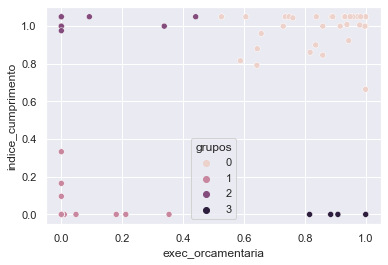

In [39]:
sns.scatterplot(x= df['exec_orcamentaria'], y = df['indice_cumprimento'], hue=df['grupos'])

In [40]:
import plotly.express as px

In [46]:
df['grupos'] = df['grupos'].astype(str)

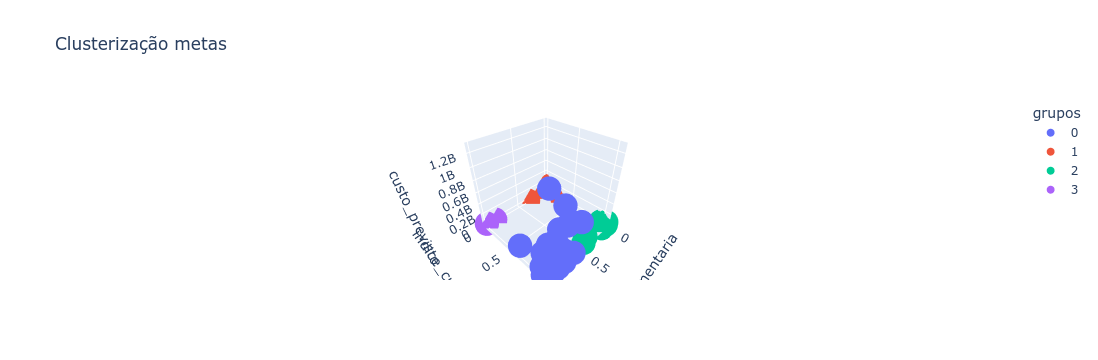

In [47]:
fig = px.scatter_3d(df, x='exec_orcamentaria', y='indice_cumprimento', z='custo_previsto',
              color='grupos', title = "Clusterização metas")
fig.show()

In [48]:
fig.write_html("clusters_metas.html")